In [18]:
#!pip install pandas

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/migraine-dataset/migraine_data.csv


In [20]:
data=pd.read_csv('/kaggle/input/migraine-dataset/migraine_data.csv')
data.head(10)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
5,49,1,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Migraine without aura
6,27,1,5,1,1,3,1,0,1,1,...,1,1,0,0,0,0,0,0,0,Basilar-type aura
7,24,1,1,1,1,2,1,0,1,1,...,1,0,0,0,0,0,0,0,1,Typical aura with migraine
8,50,1,5,1,1,2,1,1,1,1,...,1,0,0,0,0,0,0,0,1,Typical aura with migraine
9,23,1,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [21]:
data.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [23]:
data.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [24]:
data.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [25]:
col=data.select_dtypes(include='int64')
corel=col.corr()
corel

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
Age,1.000000,-0.045263,0.073431,0.133766,0.128077,0.114036,0.006542,-0.028650,-0.101022,-0.031461,...,-0.048333,-0.026967,-0.098046,-0.008872,0.033883,0.028449,NaN,-0.039212,-0.000275,0.088623
Duration,-0.045263,1.000000,0.149240,-0.003515,0.005733,0.052115,-0.144654,-0.046468,-0.011165,-0.072356,...,-0.039660,0.122716,-0.022421,0.009082,0.035904,0.062503,NaN,-0.056207,0.081661,0.072351
Frequency,0.073431,0.149240,1.000000,-0.033373,-0.030762,0.070793,0.037977,0.133929,0.043154,0.031151,...,-0.010917,-0.064355,-0.061381,-0.063772,-0.057808,-0.076059,NaN,-0.097445,-0.053578,0.052049
Location,0.133766,-0.003515,-0.033373,1.000000,0.933517,0.658737,-0.011551,0.030900,-0.267320,-0.214672,...,0.005140,-0.045861,-0.013362,0.012670,0.007278,0.012670,NaN,0.013702,0.008925,-0.028276
Character,0.128077,0.005733,-0.030762,0.933517,1.000000,0.648325,-0.009123,0.017396,-0.437568,-0.397716,...,0.004059,-0.023838,-0.017451,0.010007,0.005748,0.010007,NaN,0.010822,0.007049,-0.023997
Intensity,0.114036,0.052115,0.070793,0.658737,0.648325,1.000000,0.010261,-0.011358,-0.104765,-0.098647,...,-0.030656,-0.024622,-0.099848,0.031620,0.048950,0.085214,NaN,0.092158,0.060027,-0.073378
Nausea,0.006542,-0.144654,0.037977,-0.011551,-0.009123,0.010261,1.000000,0.077624,0.134659,0.466108,...,0.005632,-0.161592,-0.066325,0.013884,0.007976,0.013884,NaN,0.015015,0.009780,-0.134965
Vomit,-0.028650,-0.046468,0.133929,0.030900,0.017396,-0.011358,0.077624,1.000000,-0.003516,0.022157,...,0.072561,-0.082881,-0.039186,-0.041140,0.026919,0.002860,NaN,0.030285,0.002015,0.022945
Phonophobia,-0.101022,-0.011165,0.043154,-0.267320,-0.437568,-0.104765,0.134659,-0.003516,1.000000,0.700786,...,0.007595,-0.197516,0.038331,0.018722,0.010755,0.018722,NaN,0.020248,0.013189,-0.044900
Photophobia,-0.031461,-0.072356,0.031151,-0.214672,-0.397716,-0.098647,0.466108,0.022157,0.700786,1.000000,...,0.007152,-0.161985,0.036092,0.017629,0.010127,0.017629,NaN,0.019066,0.012418,-0.062449


## ****Exploratory Data Analysis

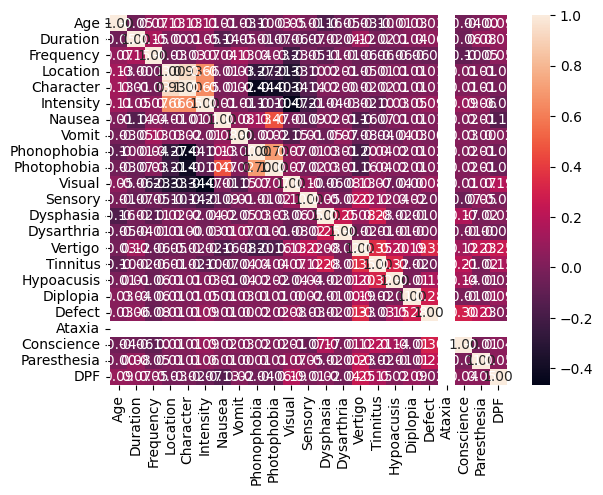

In [26]:
sns.heatmap(corel, annot=True,fmt='.2f')
plt.show()

## Age

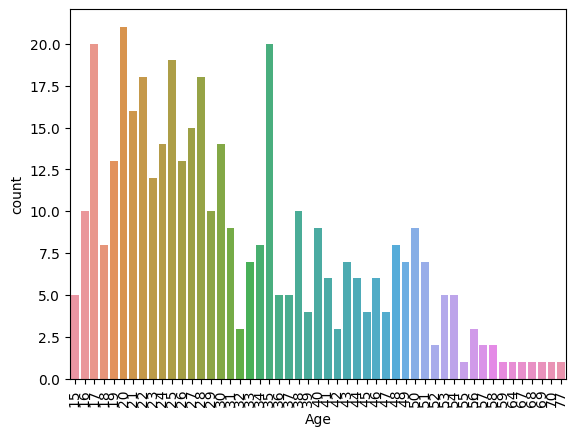

In [27]:
sns.countplot(data=data, x='Age')
plt.xticks(rotation=90)
plt.show()

# Distribution of the numerical columns

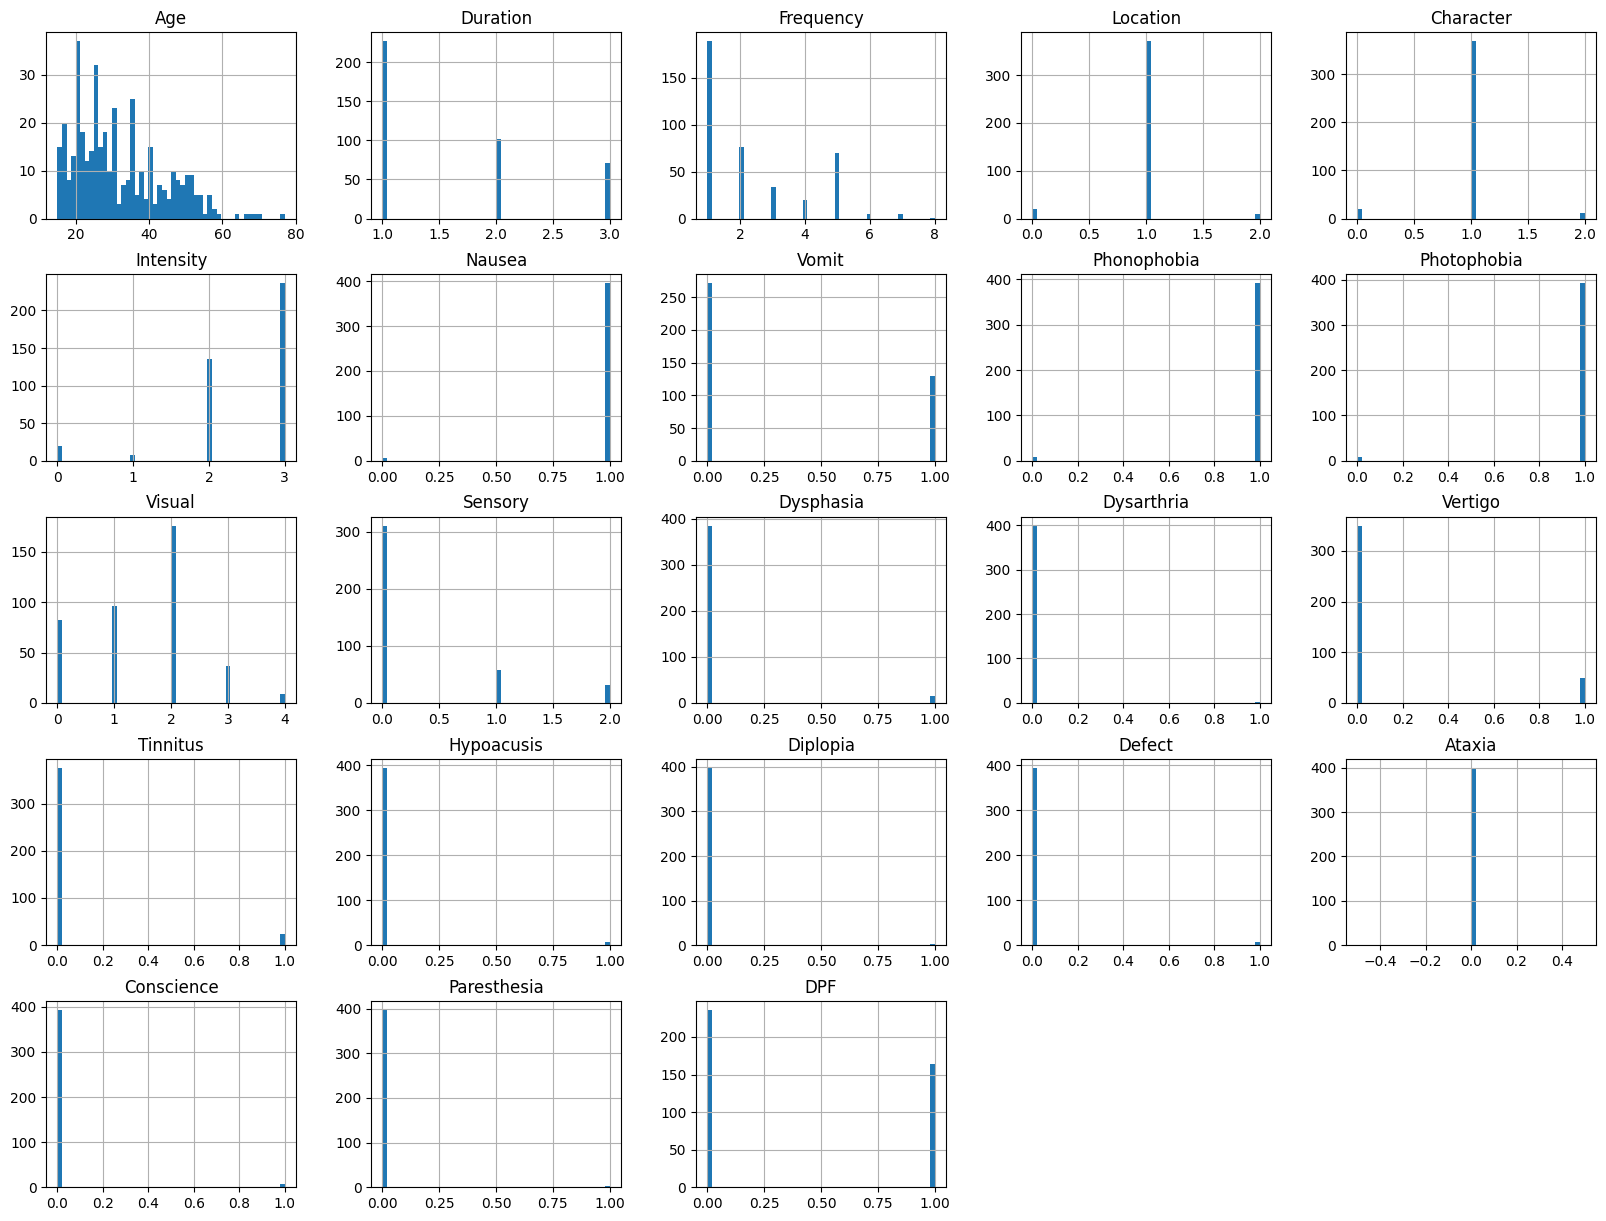

In [28]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# Distribution of the categorical column 'Type'

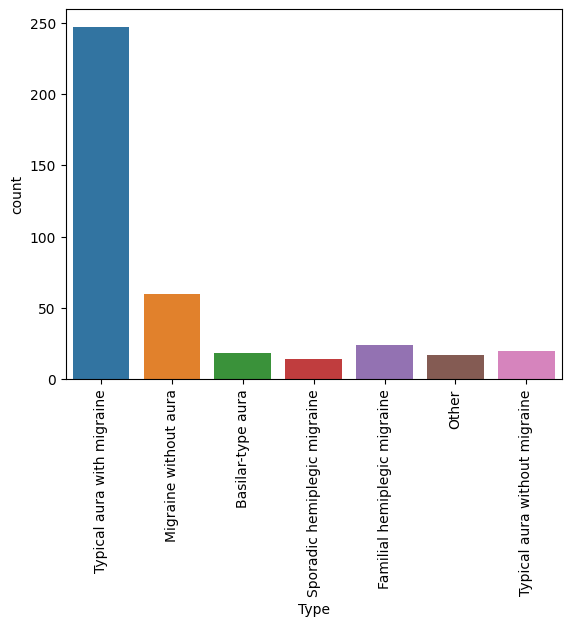

In [29]:
sns.countplot(x='Type', data=data)
plt.xticks(rotation=90)
plt.show()

# Relationship between the categorical column 'Type' and the numerical columns

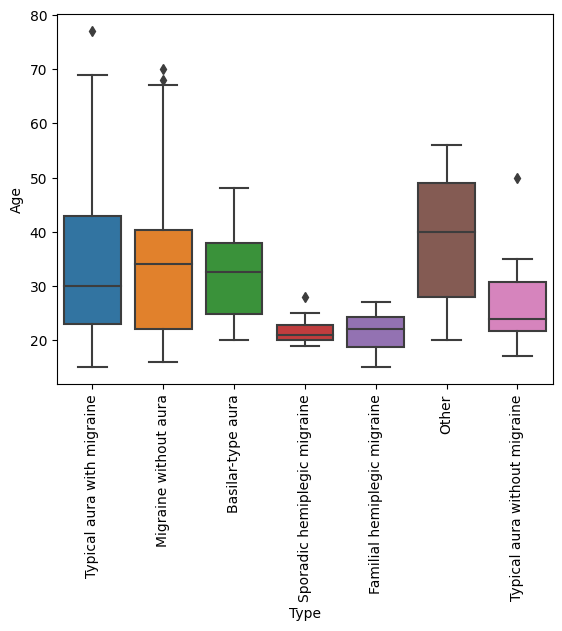

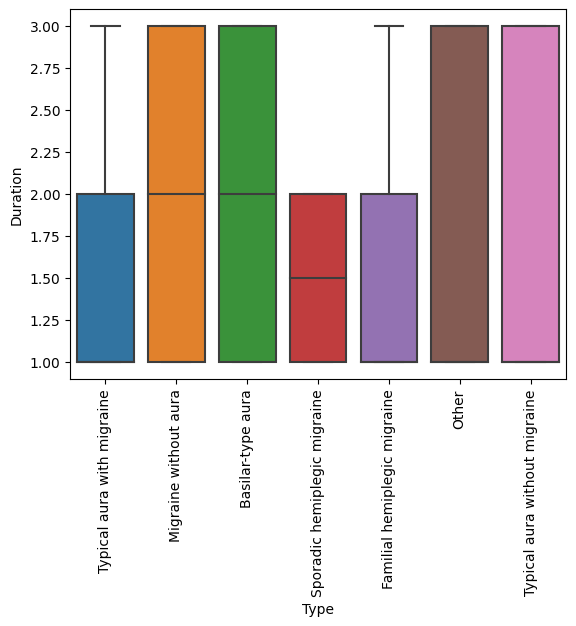

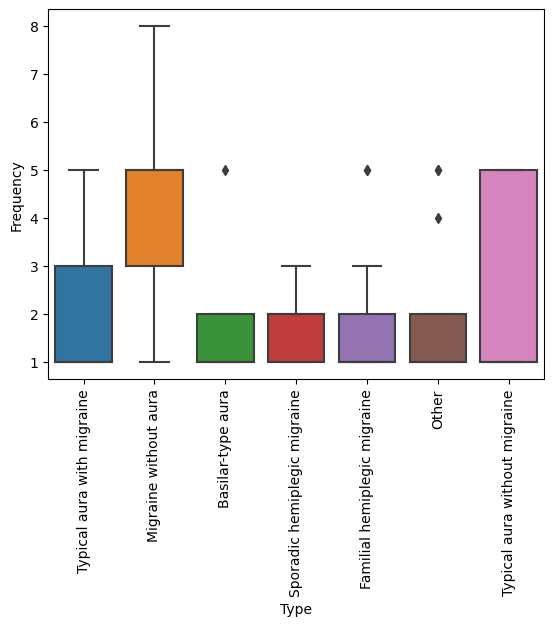

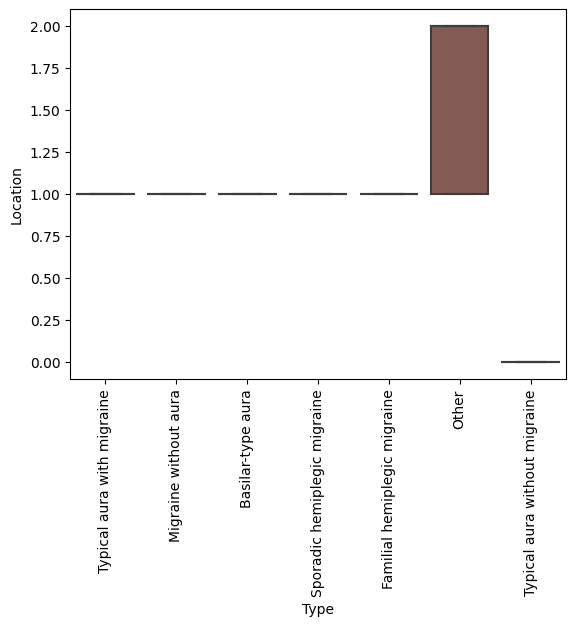

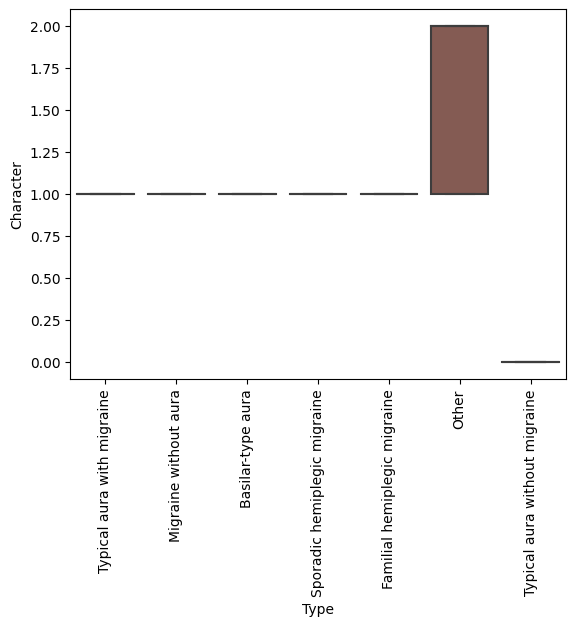

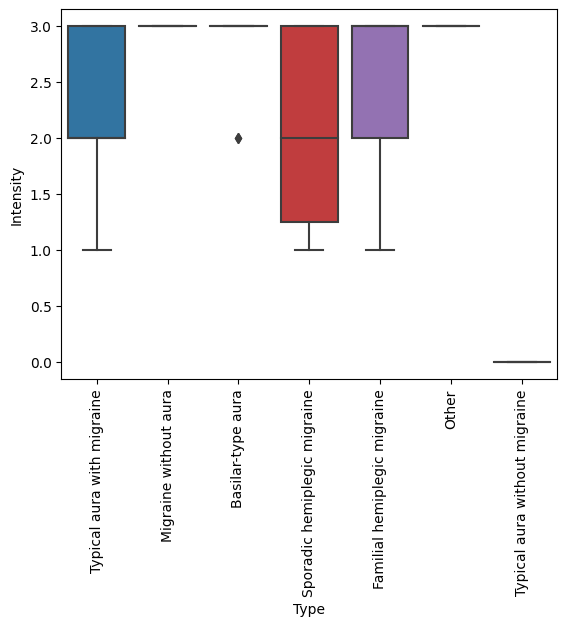

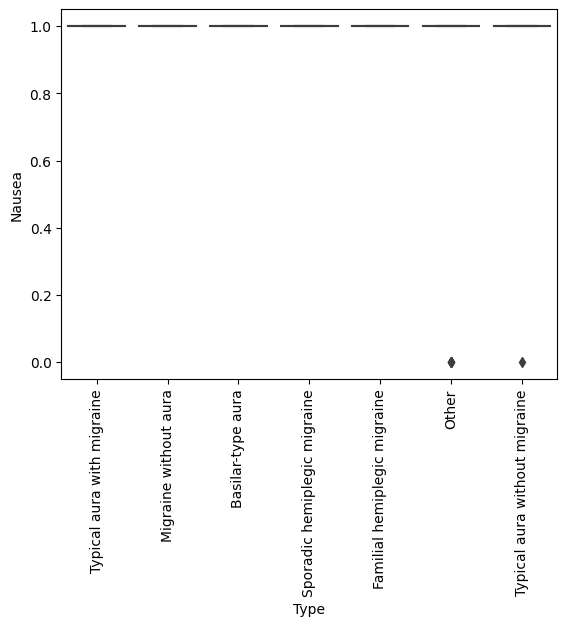

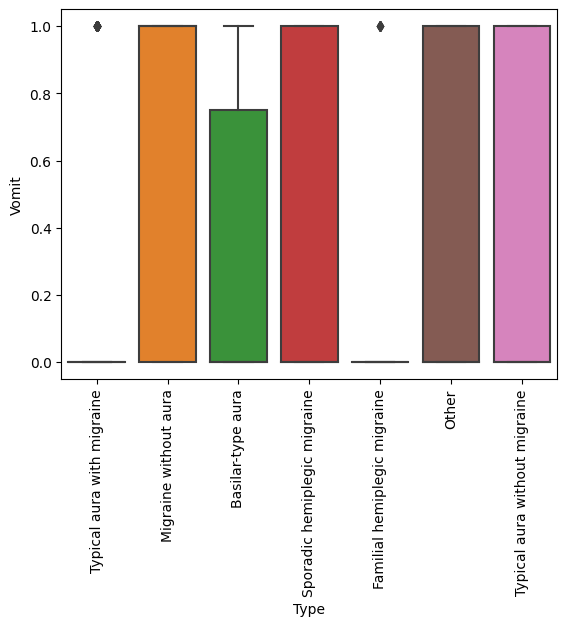

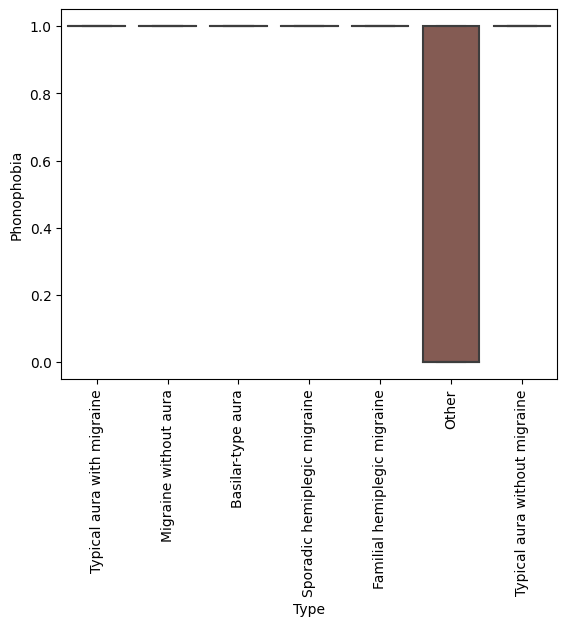

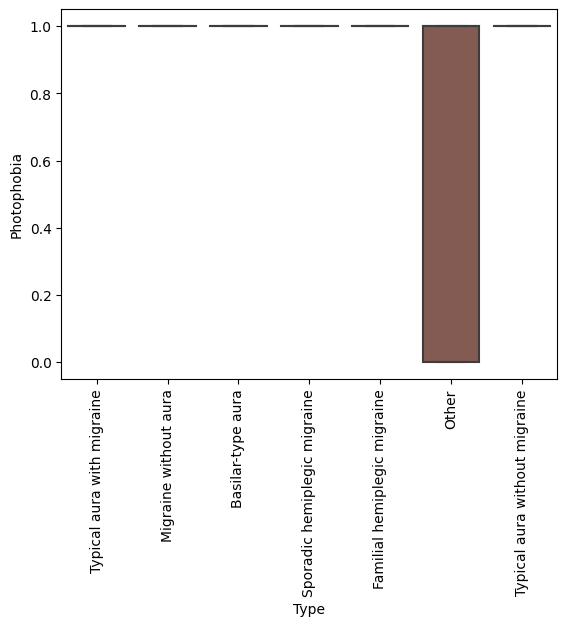

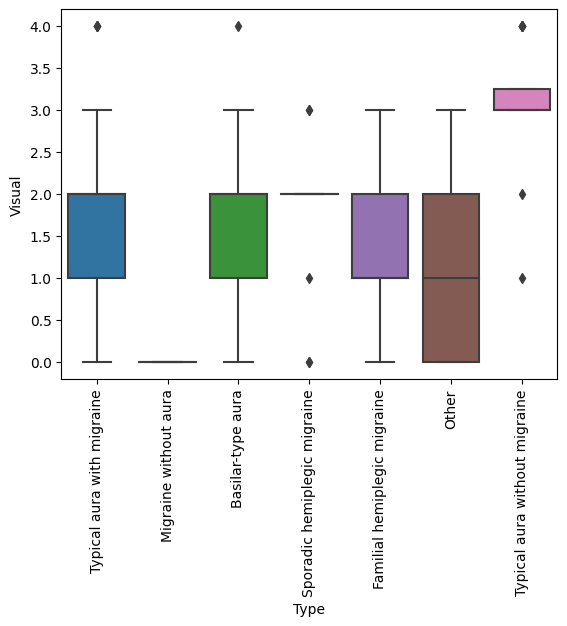

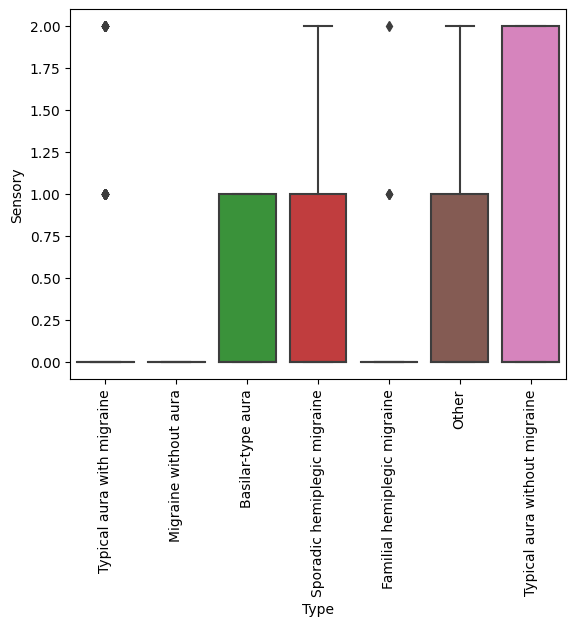

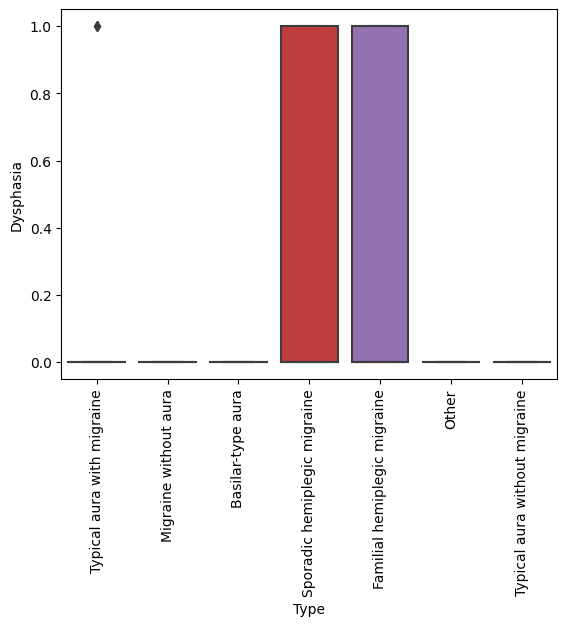

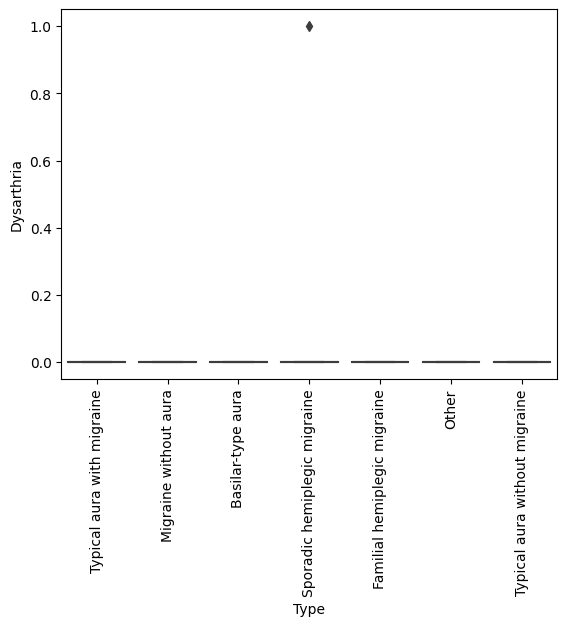

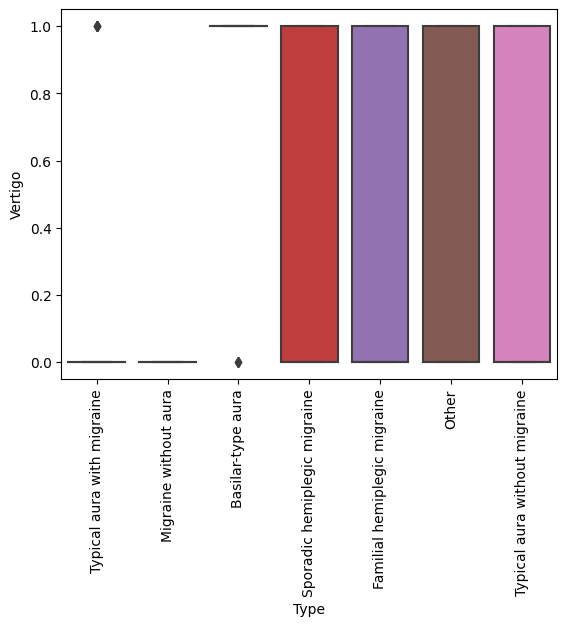

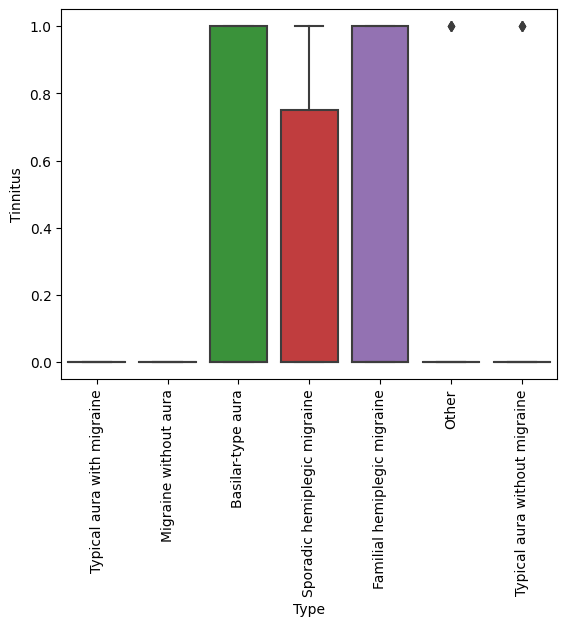

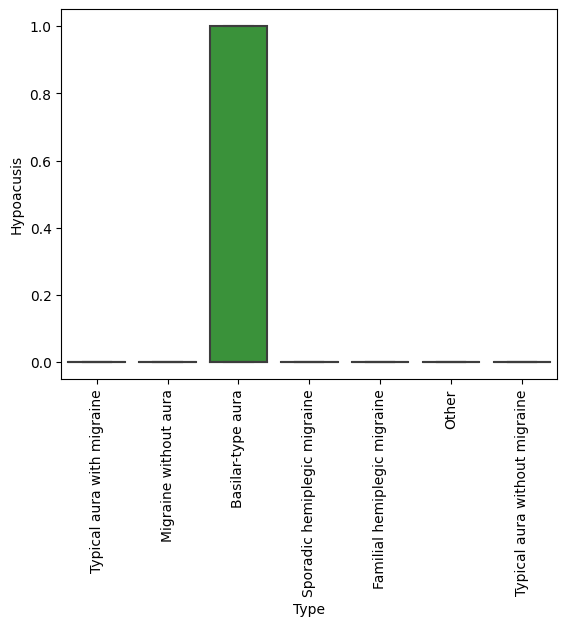

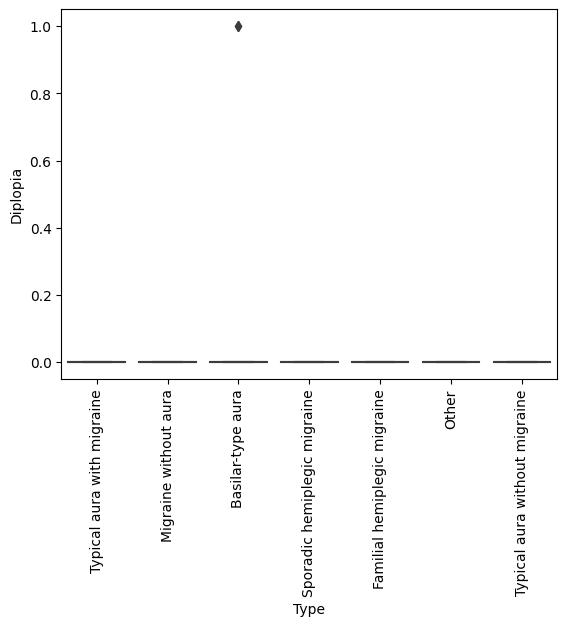

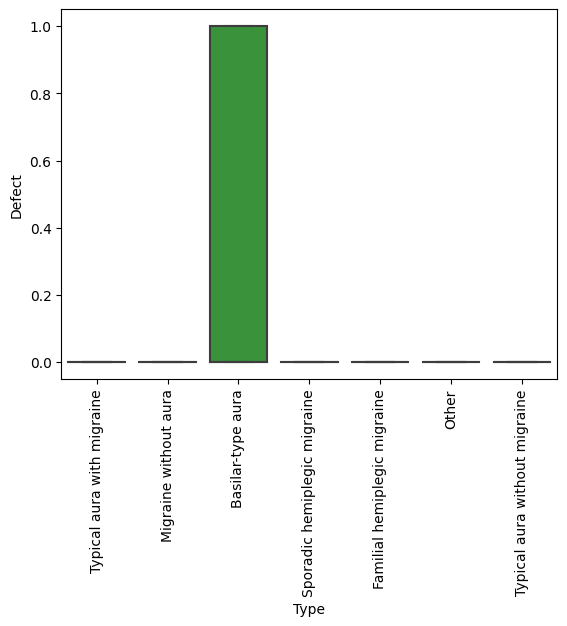

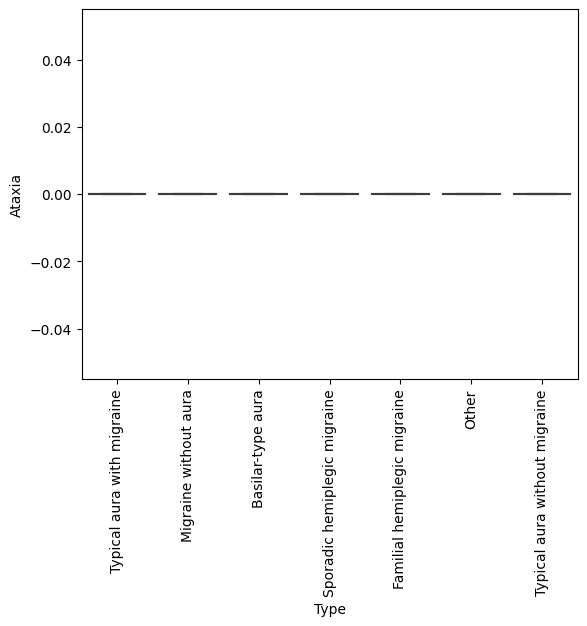

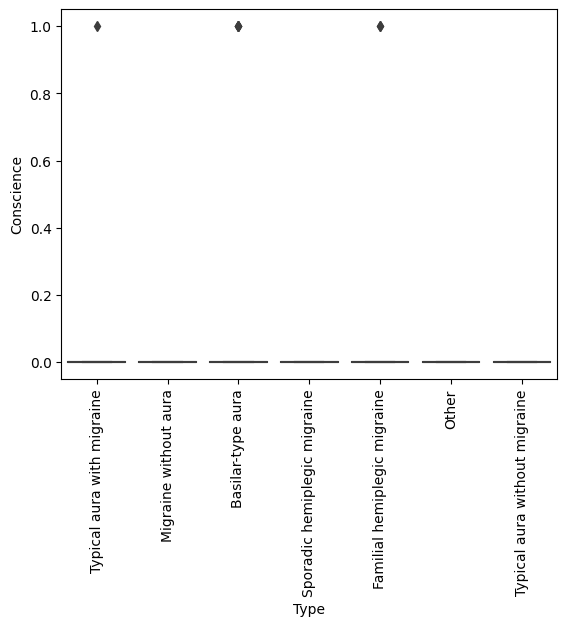

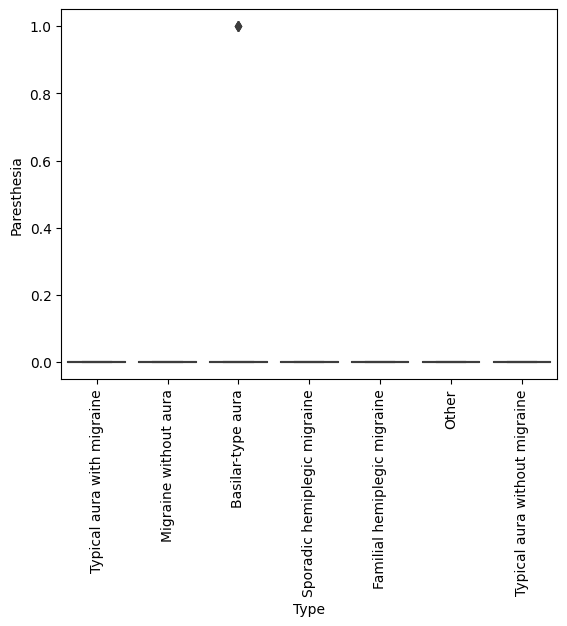

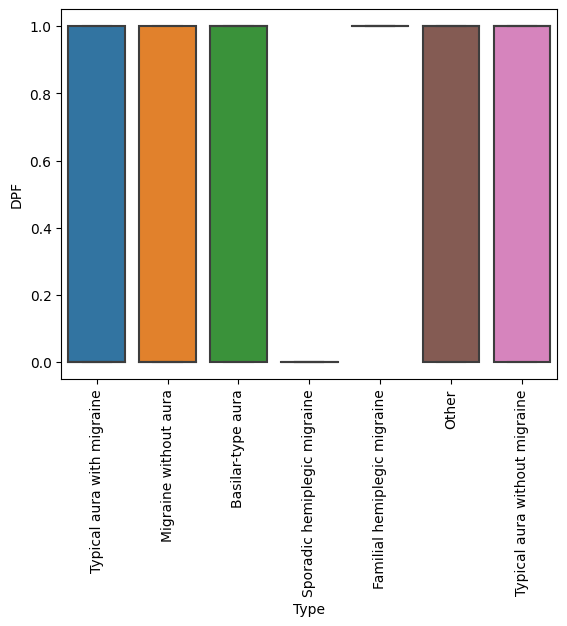

In [30]:
for col in data.columns:
    if data[col].dtype == 'int64':
        sns.boxplot(x='Type', y=col, data=data)
        plt.xticks(rotation=90)
        plt.show()

 # Relationship between the categorical column 'Type' and the numerical columns

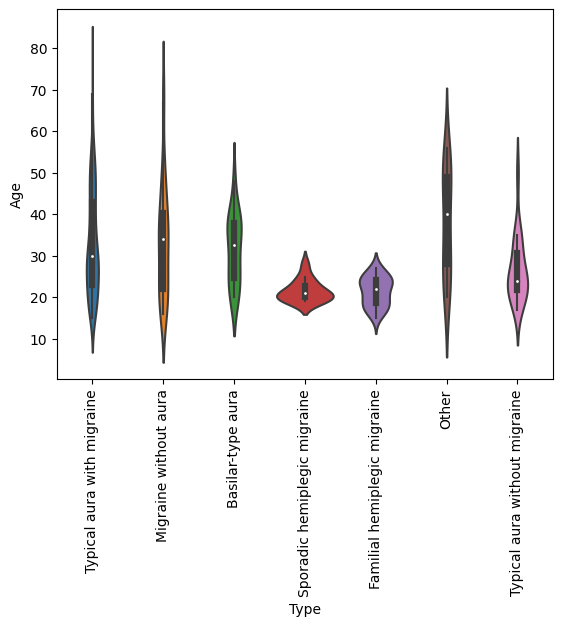

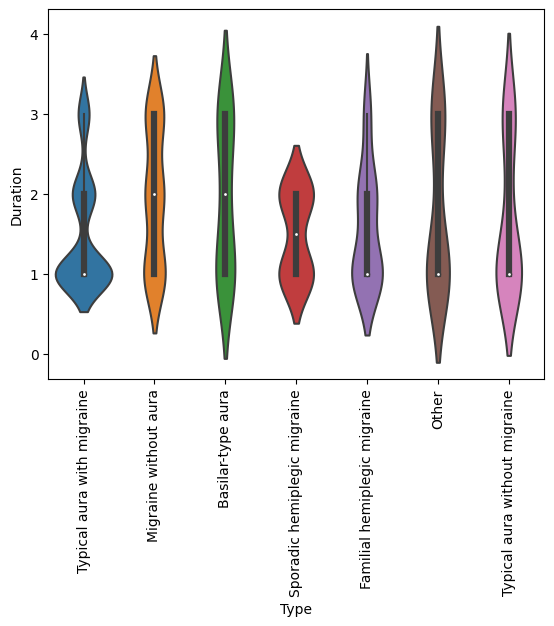

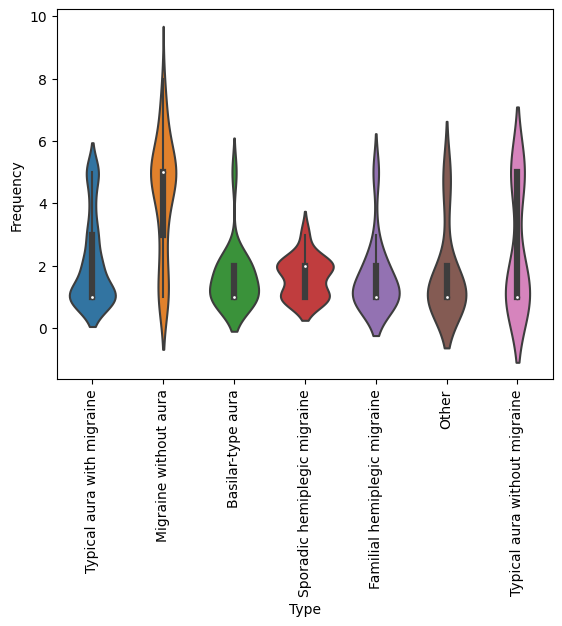

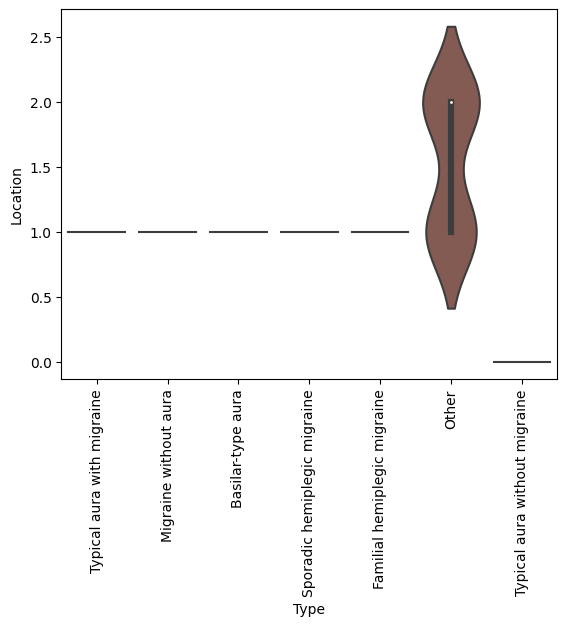

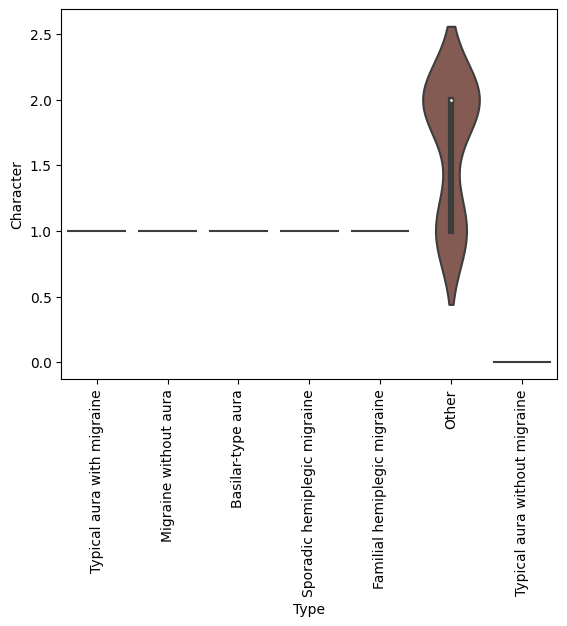

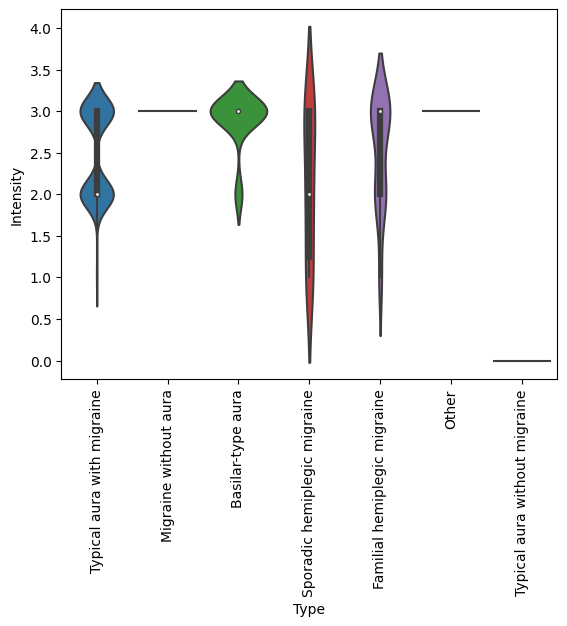

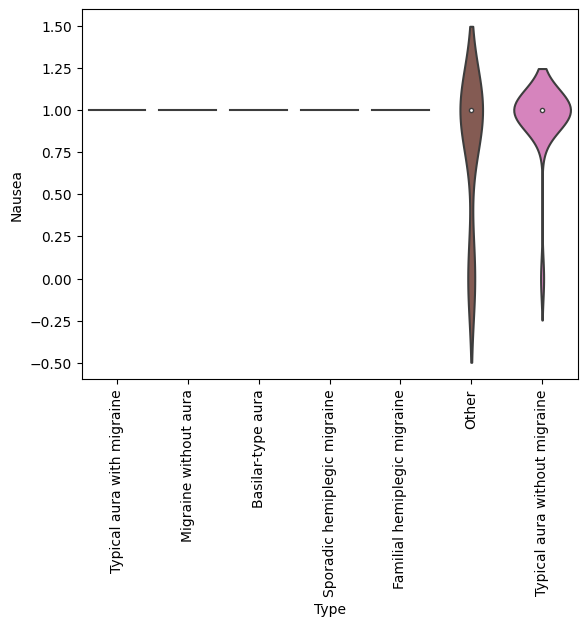

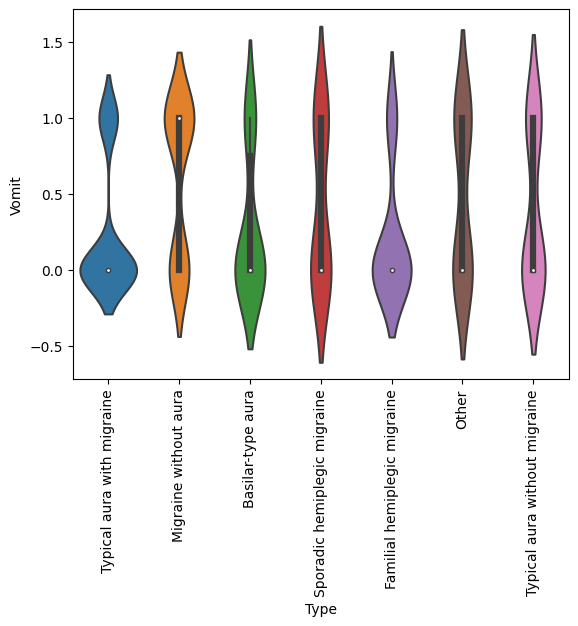

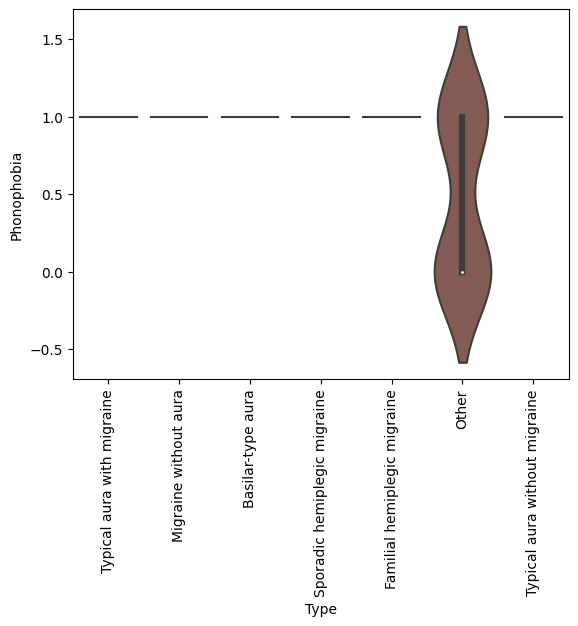

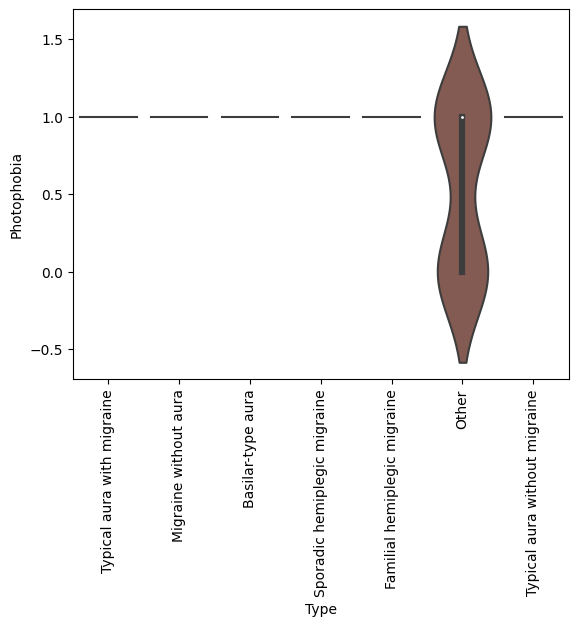

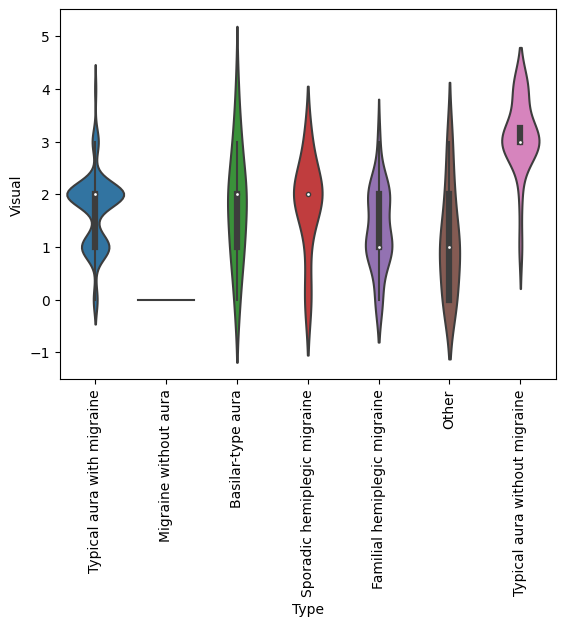

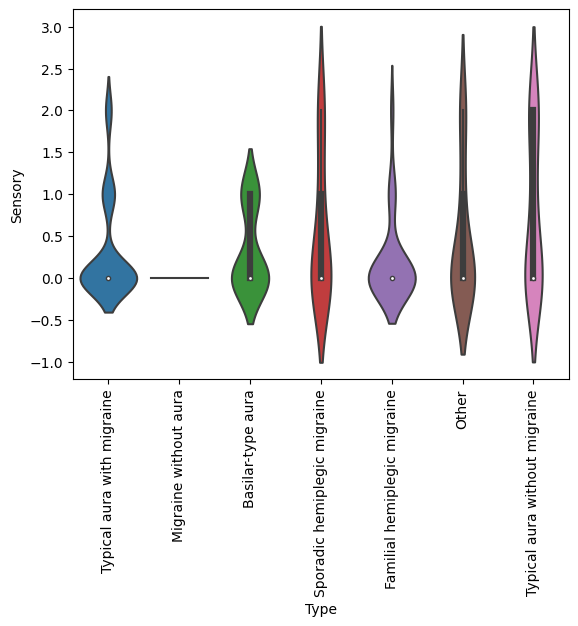

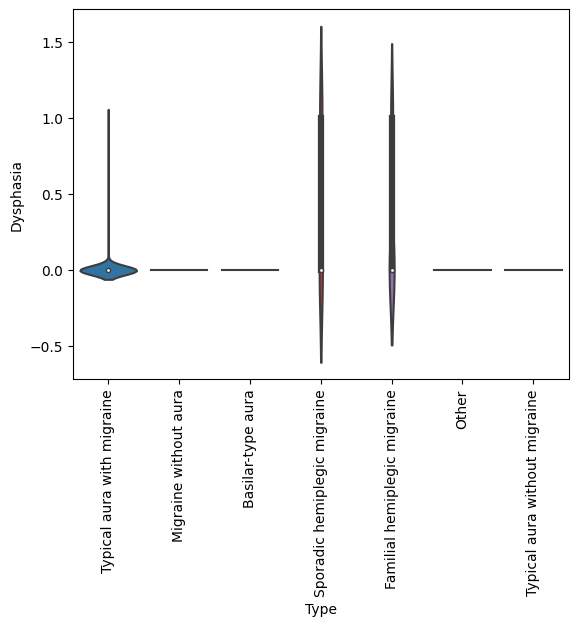

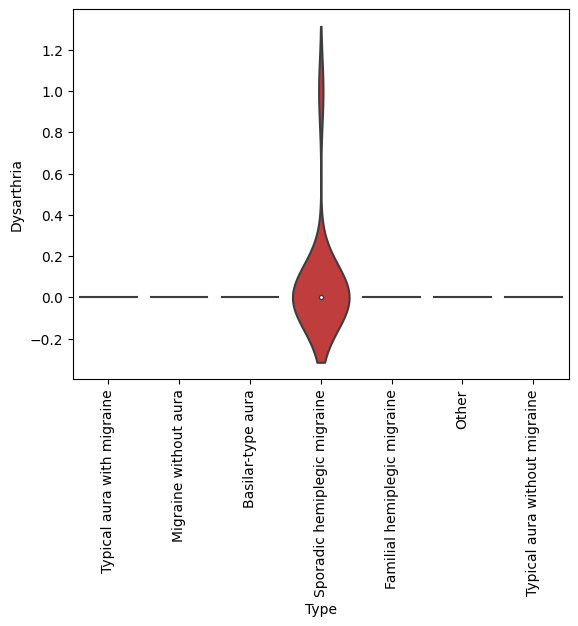

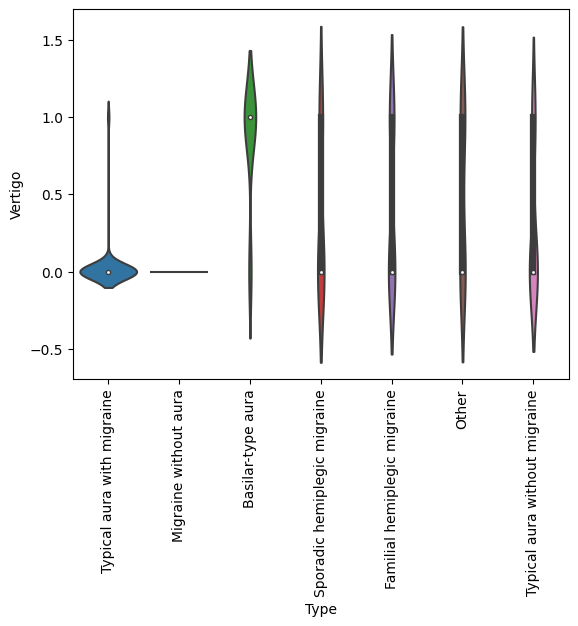

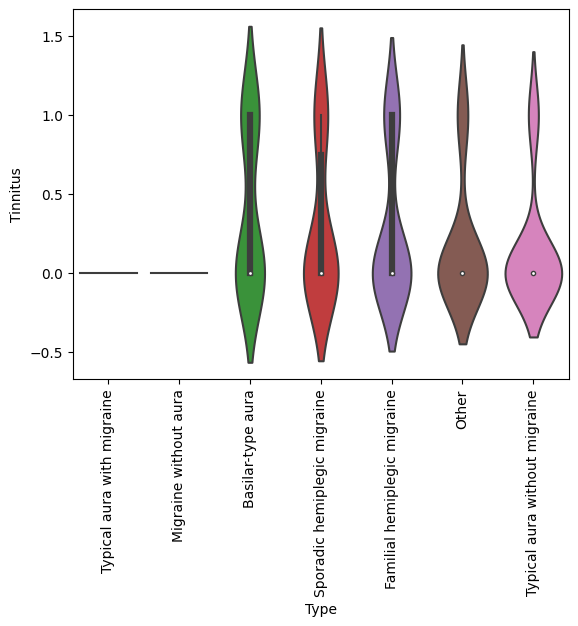

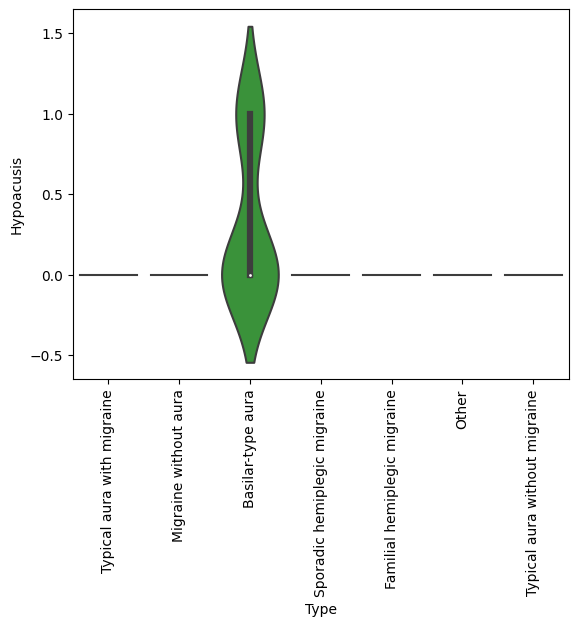

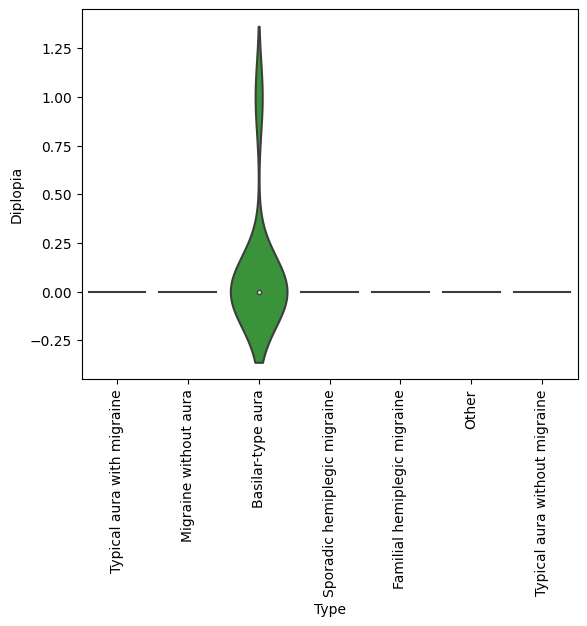

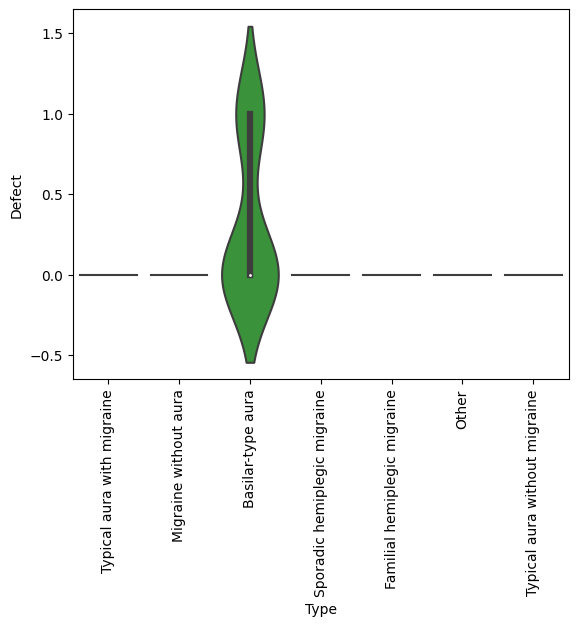

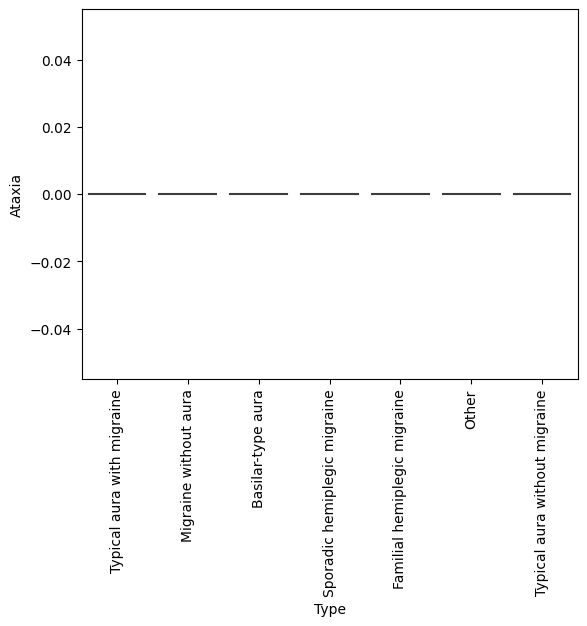

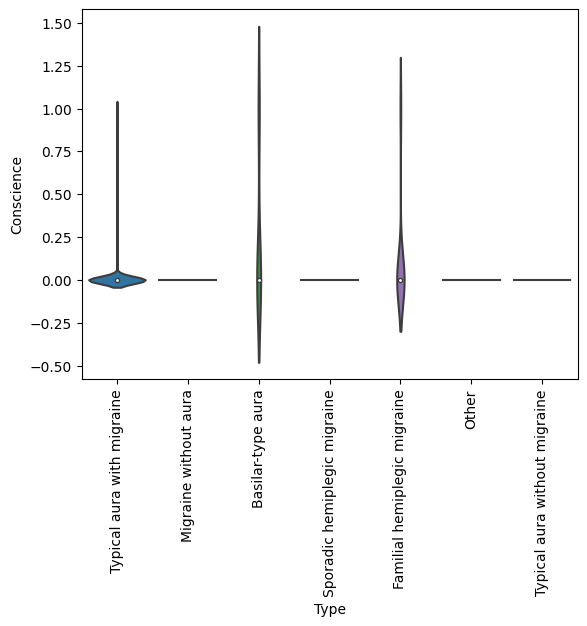

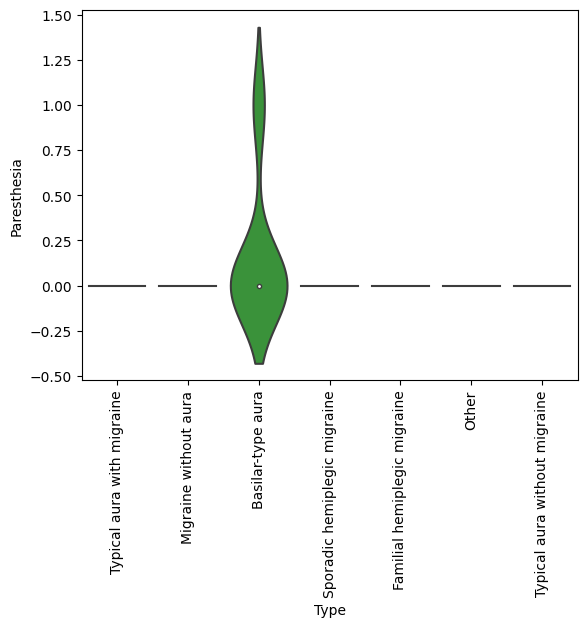

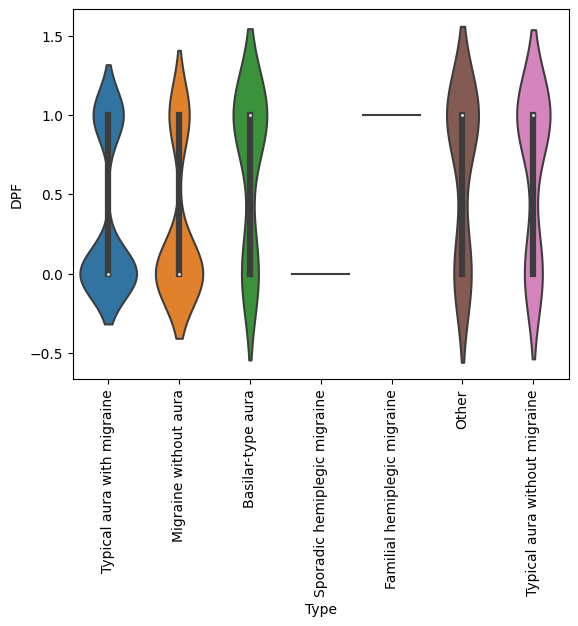

In [31]:
for col in data.columns:
    if data[col].dtype == 'int64':
        sns.violinplot(x='Type', y=col, data=data)
        plt.xticks(rotation=90)
        plt.show()

# Relationship between two numerical columns

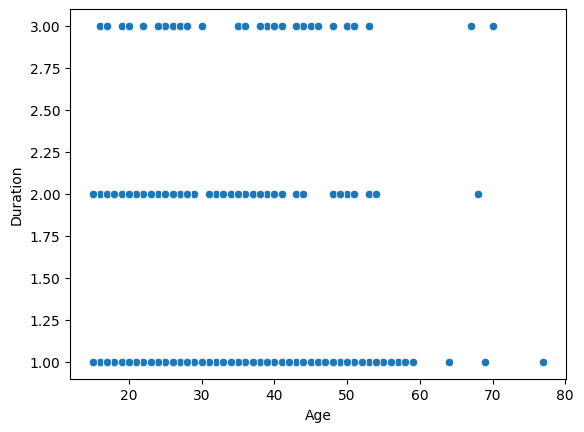

In [32]:
sns.scatterplot(x='Age', y='Duration', data=data)
plt.show()

# Relationship between the categorical column 'Type' and the numerical columns

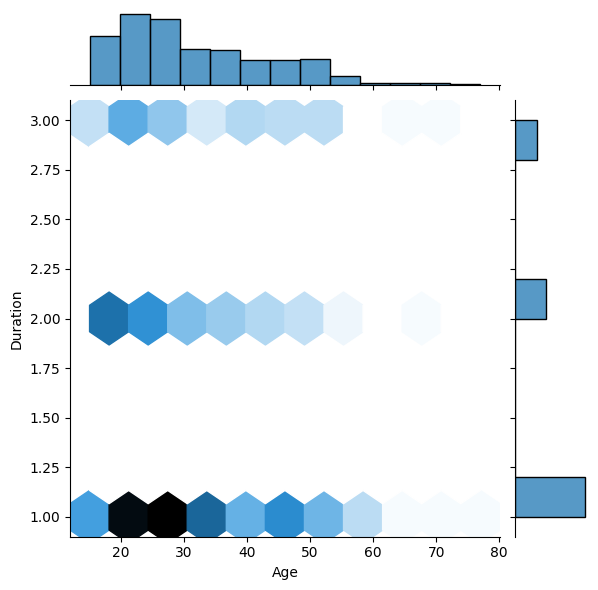

In [33]:
sns.jointplot(x='Age', y='Duration', data=data, kind='hex')
plt.show()

## ****Data Splitting

In [34]:
X = data.drop("Type", axis=1) 
y = data["Type"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ****Model Selection

In [35]:
model = RandomForestClassifier()  

# ****Model Training

In [36]:
model.fit(X_train, y_train)

RandomForestClassifier()

# ****Model Evaluation

In [37]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9125
                               precision    recall  f1-score   support

            Basilar-type aura       0.83      0.83      0.83         6
 Familial hemiplegic migraine       0.67      0.67      0.67         3
        Migraine without aura       0.81      1.00      0.90        13
                        Other       1.00      0.50      0.67         4
 Sporadic hemiplegic migraine       0.00      0.00      0.00         2
   Typical aura with migraine       0.98      0.98      0.98        49
Typical aura without migraine       1.00      1.00      1.00         3

                     accuracy                           0.91        80
                    macro avg       0.76      0.71      0.72        80
                 weighted avg       0.91      0.91      0.90        80



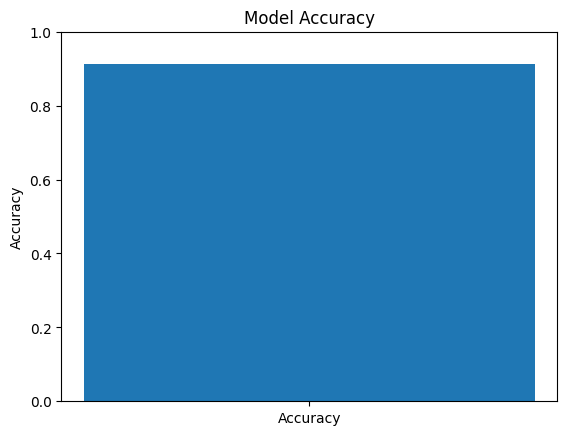

In [38]:
# Create a bar plot for accuracy
plt.bar(["Accuracy"], [accuracy])
plt.ylim(0, 1)  # Set the y-axis limits for accuracy values between 0 and 1
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()
